<a href="https://colab.research.google.com/github/Meghashyamt/Heart-Disease/blob/master/Heart_Disease_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data to Improve Process


**Data Description**

**age:** The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

In [0]:
#!git clone https://github.com/Humeraafroz/Heart-Disease

# Importing Libraries

In [0]:
#Importing Libraries

import seaborn as sb
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd


In [0]:
#data = pd.read_csv("C:\\Users\\HP\\Downloads\\Heart-Disease-master\\Heart-Disease-master\\heart.csv")
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.shape

(303, 14)

In [0]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

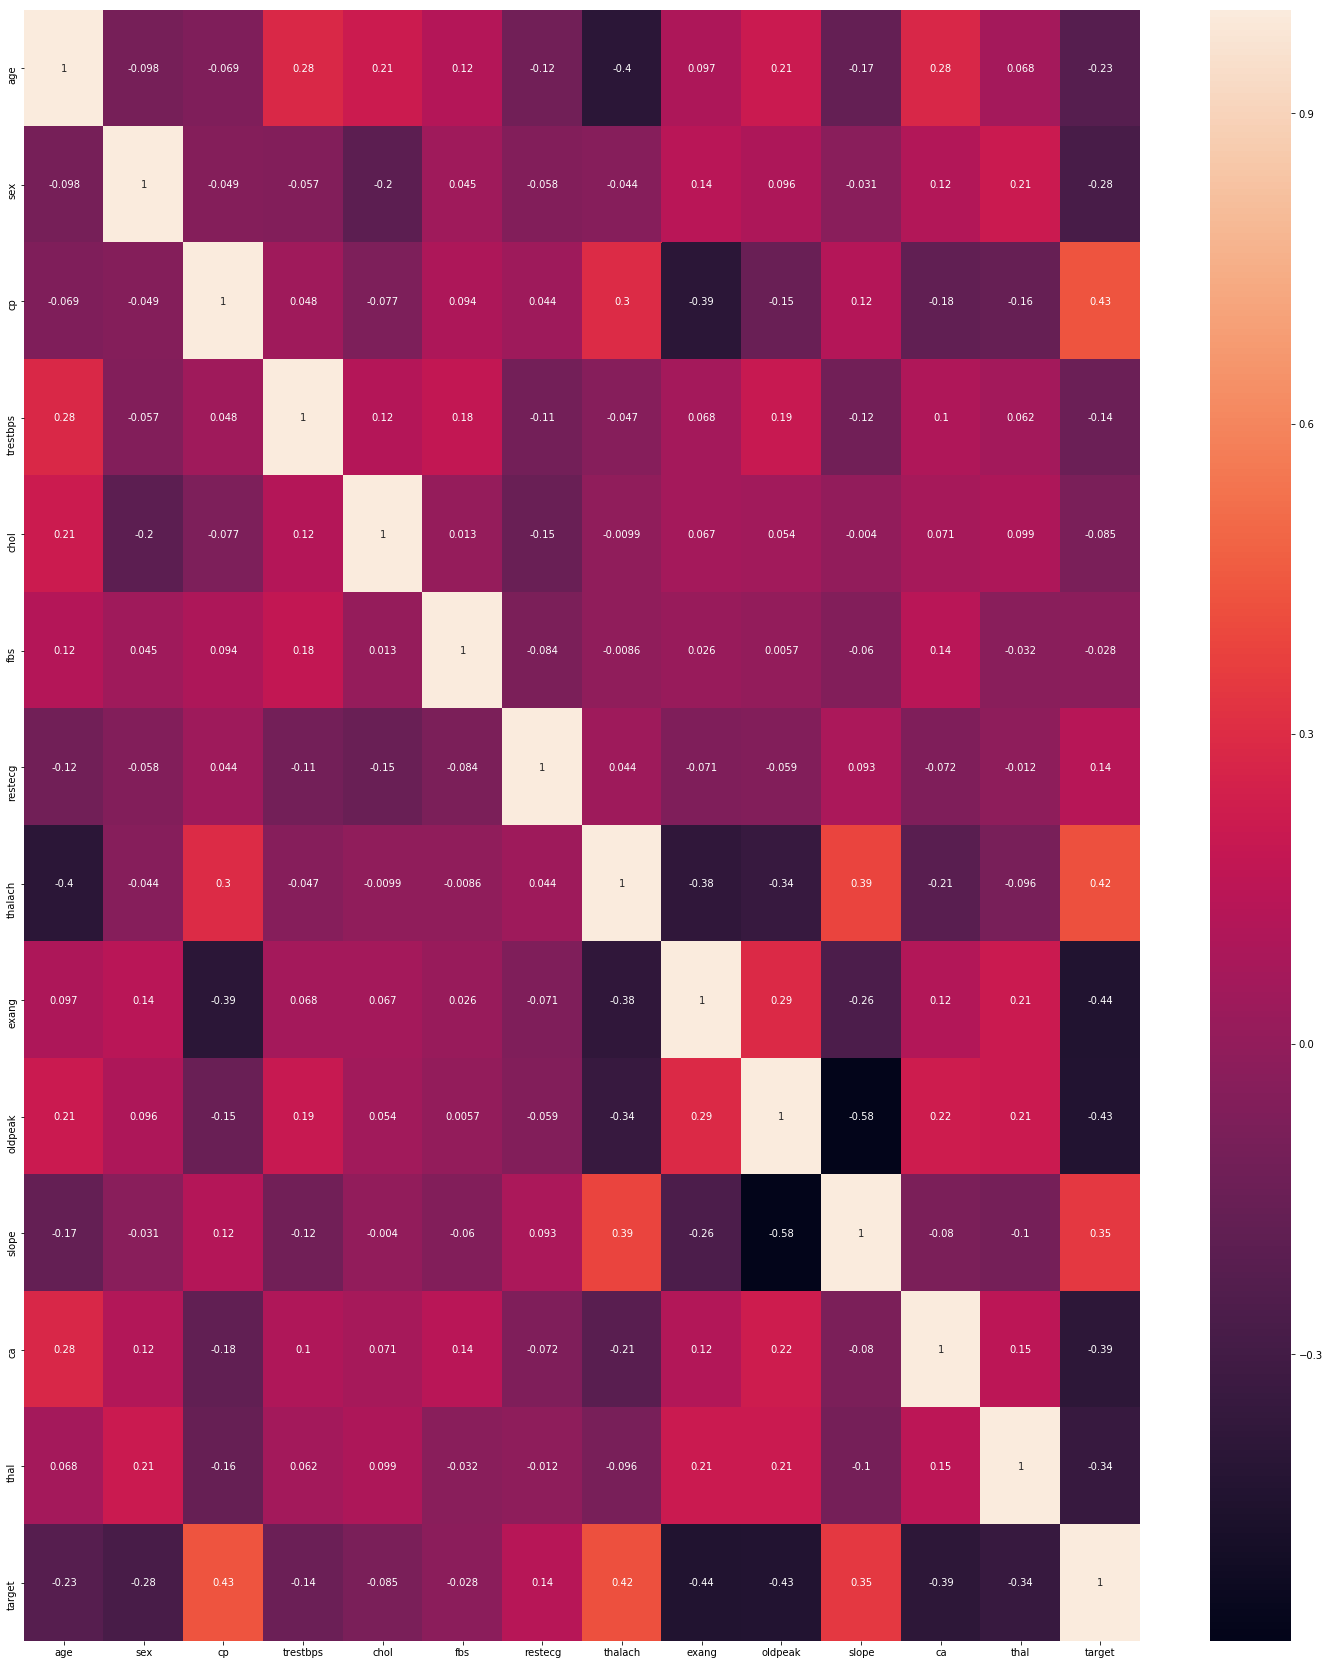

In [0]:
plt.figure(figsize=(25, 30))
ax = sb.heatmap(data.corr(), annot=True)

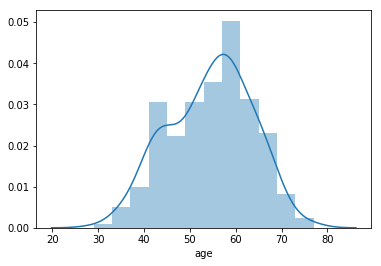

In [0]:
sb.distplot(data['age'])

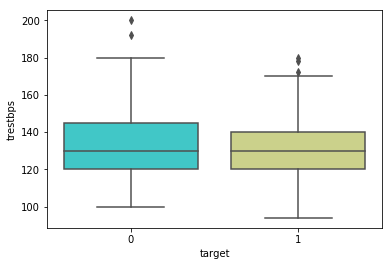

In [0]:
sb.boxplot(x="target", y="trestbps", data=data,palette='rainbow')

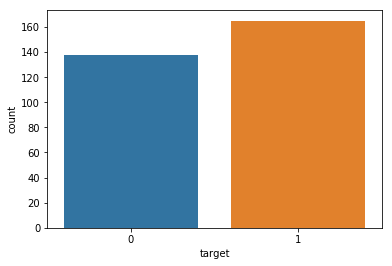

In [0]:
sb.countplot(data.target)

# Exploratory Data Analysis

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X= data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [0]:
y = y.apply(lambda x: 1 if x >= 1 else 0)

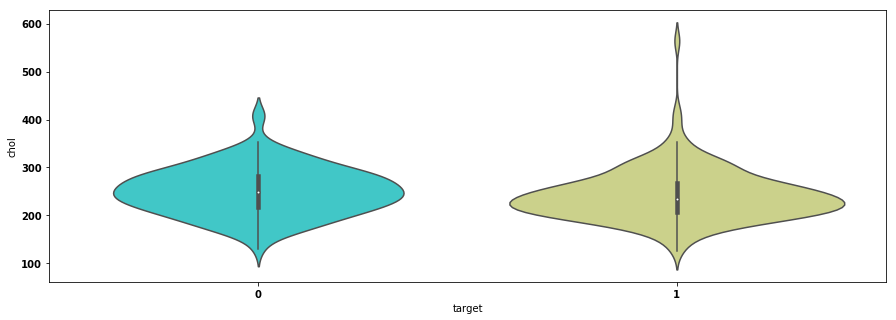

In [705]:
sb.violinplot(x="target", y="chol", data=data,palette='rainbow')

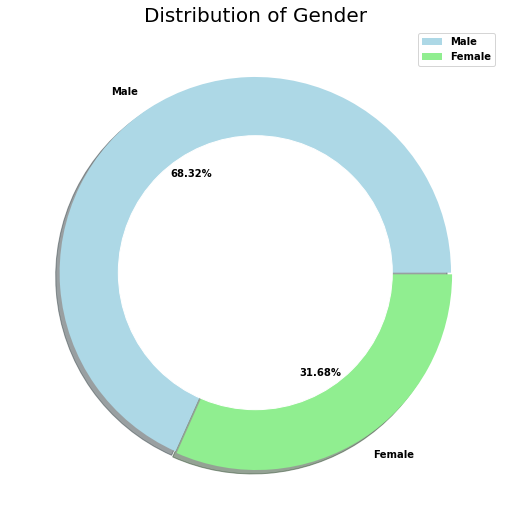

In [706]:
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

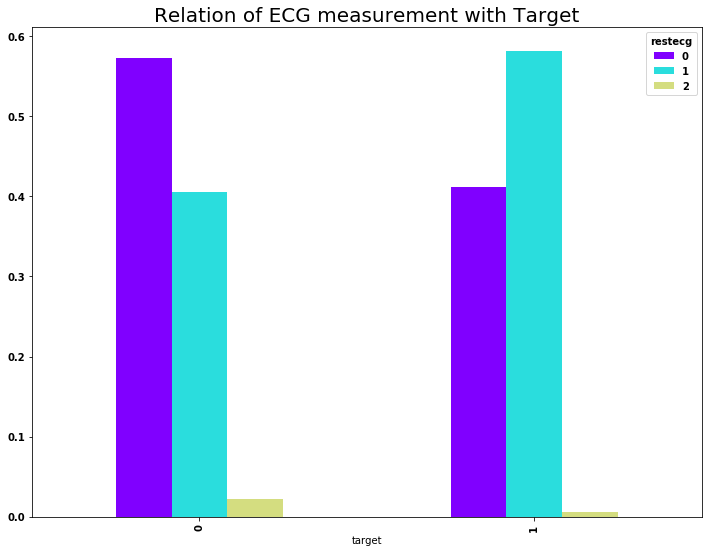

In [707]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

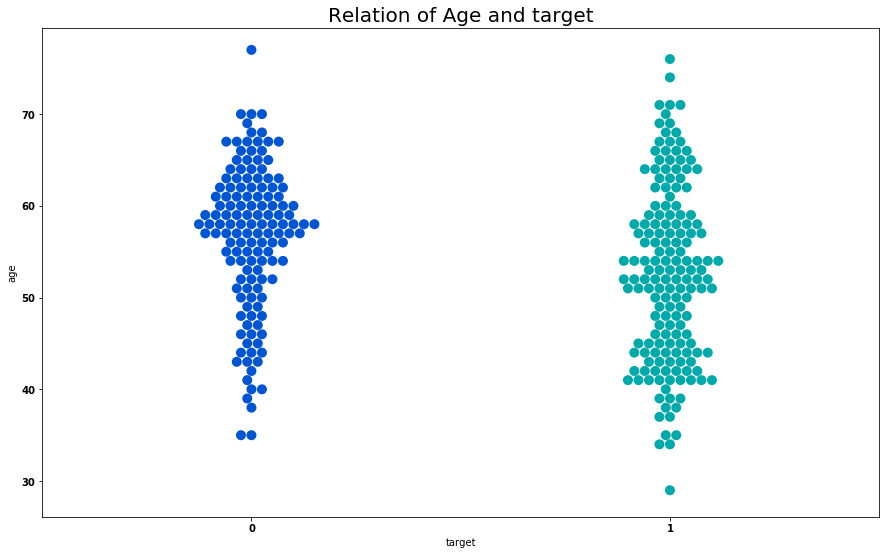

In [708]:
plt.rcParams['figure.figsize'] = (15, 9)
sb.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

In [709]:
correlation = data.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


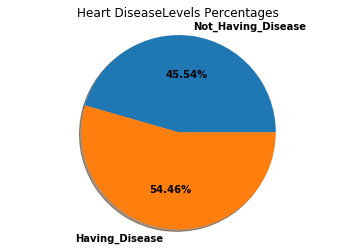

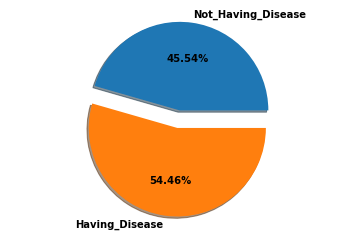

In [710]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import rc
%matplotlib inline
Not_Having_Disease = len(data[data.target == 0])
Having_Disease =len(data[data.target == 1])+len(data[data.target == 2])+\
len(data[data.target == 3])+len(data[data.target == 4])
rc('font', weight='bold')
labels = ['Not_Having_Disease', 'Having_Disease']
values = [Not_Having_Disease, Having_Disease]
explode = (0.1, 0.1)

fig_Disease_Level_percentage, ax1 = plt.subplots()
plt.title('Heart Disease Levels Percentages\n\n')
ax1.pie(values,labels=labels, autopct='%1.2f%%',shadow=True)
ax1.axis('equal')
plt.title('Heart DiseaseLevels Percentages')
fig_Disease_Level_percentage, ax = plt.subplots()
ax.pie(values,explode=explode ,labels=labels, autopct='%1.2f%%',shadow=True)
ax.axis('equal')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.30, random_state=30)

In [0]:
stdScalaer=StandardScaler()
X_train=stdScalaer.fit_transform(X_train)
X_test=stdScalaer.fit_transform(X_test)

# Logistic Regression

In [0]:
model_lr=LogisticRegression(penalty='l1',C=1.0)

In [714]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict_lr=model_lr.predict(X_test)

In [716]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
accuracy_score(y_test, predict_lr)

0.8021978021978022

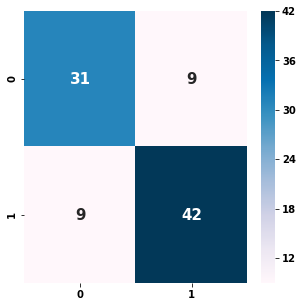

In [717]:

cm = confusion_matrix(y_test, predict_lr)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [718]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.775
Specificity :  0.8235294117647058


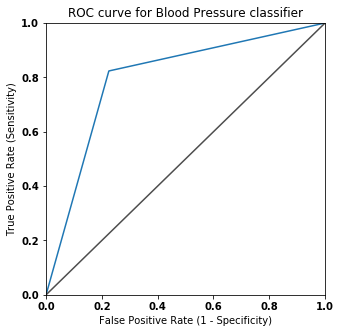

In [719]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_lr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [720]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(model_lr, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(X,y)
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 6, min_samples_leaf= 8)

In [723]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predict_dt=model_dt.predict(X_test)

In [725]:
accuracy_score(y_test, predict_dt)

0.7032967032967034

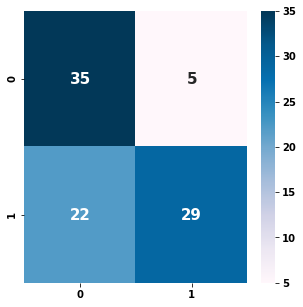

In [726]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_dt)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [727]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.875
Specificity :  0.5686274509803921


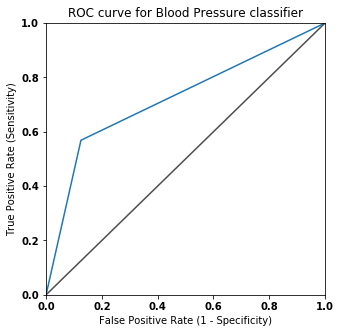

In [728]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_dt)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [729]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4}
Best score is 0.8066037735849056


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state = 1, max_depth = 15,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)

In [731]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
predict_rf=model_rf.predict(X_test)

In [733]:
accuracy_score(y_test, predict_dt)

0.7032967032967034

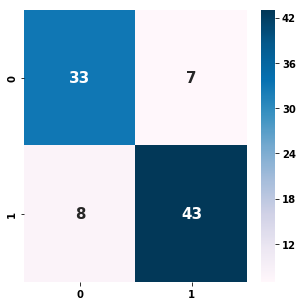

In [734]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [735]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.825
Specificity :  0.8431372549019608


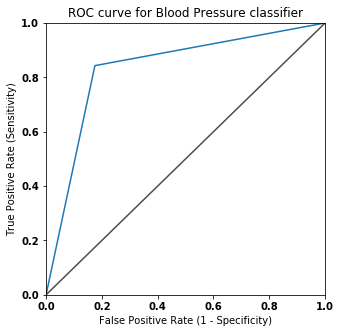

In [736]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_rf)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [737]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model_rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.2min finished


# Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA
model_p=PCA()

In [739]:
model_p.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [740]:
model_p.components_

array([[ 0.30459902,  0.09756476, -0.28589746,  0.15136427,  0.07634896,
         0.12669683, -0.13200213, -0.42646982,  0.38288022,  0.39456386,
        -0.36427842,  0.29177829,  0.22750493],
       [ 0.42715527, -0.45637238,  0.22400698,  0.45789952,  0.42487452,
         0.23020634, -0.0625816 ,  0.07221602, -0.24346188, -0.03001078,
         0.0821265 ,  0.1332305 , -0.1486511 ],
       [-0.11797697,  0.52297905,  0.25295189,  0.23256724, -0.12259814,
         0.51192369, -0.38198399,  0.29303332, -0.08167838,  0.00316181,
         0.07127042,  0.16321962,  0.21731136],
       [ 0.05567849, -0.02784906,  0.40633258,  0.06075588, -0.43063826,
         0.23359749,  0.26527999, -0.12044522, -0.15380648,  0.2972846 ,
        -0.46985213, -0.27394492, -0.30755138],
       [-0.09140565, -0.09191654, -0.19229582, -0.24589686,  0.0640535 ,
         0.22471185, -0.61547287, -0.10909234,  0.09606028, -0.18859165,
        -0.1694186 , -0.1041852 , -0.59673742],
       [-0.35046021, -0.098025

In [0]:
component = pd.DataFrame(model_p.components_)

In [742]:
component

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.304599,0.097565,-0.285897,0.151364,0.076349,0.126697,-0.132002,-0.426470,0.382880,0.394564,-0.364278,0.291778,0.227505
1,0.427155,-0.456372,0.224007,0.457900,0.424875,0.230206,-0.062582,0.072216,-0.243462,-0.030011,0.082127,0.133231,-0.148651
2,-0.117977,0.522979,0.252952,0.232567,-0.122598,0.511924,-0.381984,0.293033,-0.081678,0.003162,0.071270,0.163220,0.217311
3,0.055678,-0.027849,0.406333,0.060756,-0.430638,0.233597,0.265280,-0.120445,-0.153806,0.297285,-0.469852,-0.273945,-0.307551
4,-0.091406,-0.091917,-0.192296,-0.245897,0.064054,0.224712,-0.615473,-0.109092,0.096060,-0.188592,-0.169419,-0.104185,-0.596737
5,-0.350460,-0.098026,0.060902,0.105898,0.489089,-0.031959,-0.125055,0.212567,0.137512,0.224681,-0.318746,-0.552640,0.274212
6,-0.230160,-0.086034,-0.120643,-0.179192,0.217372,0.636772,0.539575,0.056410,0.316805,-0.147857,0.036896,0.127702,-0.077530
7,-0.009711,0.143700,-0.366981,0.690516,-0.217159,-0.021495,0.114392,0.002714,0.265205,-0.181451,0.165851,-0.356631,-0.221597
8,-0.410838,-0.339730,-0.374344,0.173367,-0.220454,-0.031611,-0.034131,0.365695,-0.212603,0.387885,-0.100165,0.381907,-0.097818
9,-0.132003,0.429890,0.235793,0.082166,0.385355,-0.298524,0.141798,0.049821,0.152505,0.320682,0.095096,0.245600,-0.528923


In [0]:
value=model_p.explained_variance_ratio_

In [744]:
value

array([0.22188289, 0.11847622, 0.09497443, 0.09040536, 0.07550229,
       0.07163225, 0.06636196, 0.06107098, 0.05427422, 0.04761037,
       0.03746244, 0.03229364, 0.02805294])

In [745]:
value.sum()

0.9999999999999998

# K Nearest Neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model_knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [747]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
predict_knn=model_knn.predict(X_test)

In [749]:
accuracy_score(y_test, predict_knn)

0.8351648351648352

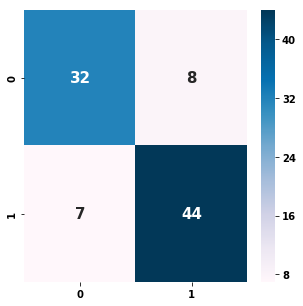

In [750]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [751]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8
Specificity :  0.8627450980392157


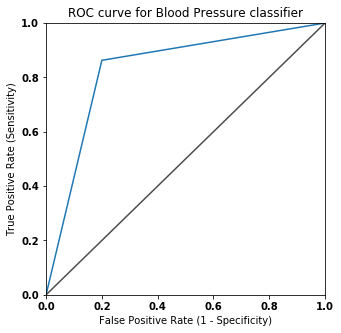

In [752]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_knn)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [753]:
myList = list(range(1,50))
from sklearn.model_selection import cross_val_score
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.7524242424242423, 0.8135064935064935, 0.8237445887445887, 0.8287662337662336, 0.8342207792207793, 0.8340043290043291, 0.8242424242424242, 0.8196969696969697, 0.8103896103896103, 0.8053896103896104, 0.8053896103896104, 0.8146969696969697, 0.8151515151515152, 0.8146969696969697, 0.8146969696969697, 0.8146969696969697, 0.8146969696969697, 0.809935064935065, 0.8144805194805194, 0.8094805194805195, 0.8192424242424241, 0.8142424242424242, 0.8142424242424242, 0.8142424242424242, 0.8187878787878787]


In [754]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [755]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


In [757]:
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=49, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [758]:
grid.score


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=49, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)>

In [759]:
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8490566037735849
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


# Support Vector Machine

In [0]:
from sklearn.svm import SVC
model_svm= SVC(C=10, kernel='linear')

In [761]:
model_svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_svm =model_svm.predict(X_test)

In [763]:
accuracy_score(y_test, predict_svm)

0.8461538461538461

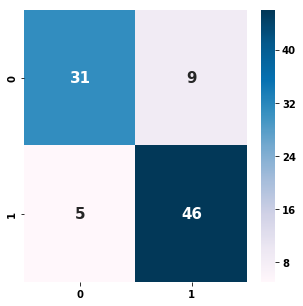

In [764]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_svm)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [765]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.775
Specificity :  0.9019607843137255


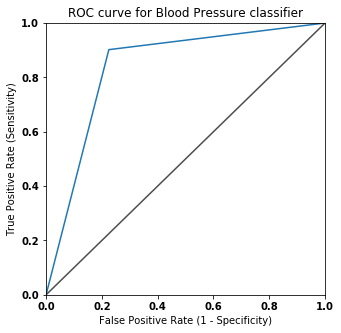

In [766]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_svm)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [767]:
from sklearn.model_selection import GridSearchCV
#Grid Search  to find the value from kernel , c , gamma
parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000]},
           {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]
grid_model_svc= GridSearchCV(SVC(), parameters)
grid_model_svc.fit(X_train, y_train)
grid_model_svc.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.839622641509434

In [768]:
grid_model_svc.best_params_

{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}

# XGBoost Classifier

In [0]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [770]:
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
predict_xg= model_xg.predict(X_test)

In [772]:
accuracy_score(y_test, predict_xg)

0.8241758241758241

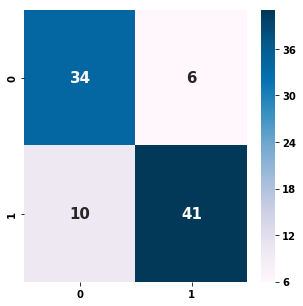

In [773]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_xg)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [774]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.85
Specificity :  0.803921568627451


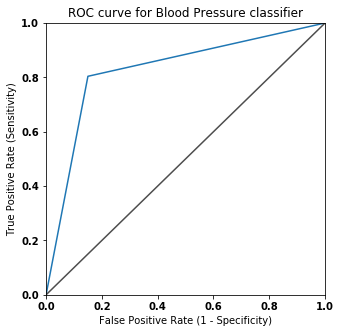

In [775]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_xg)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [776]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.score, gsearch1.best_params_, gsearch1.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=5, min_child_weight=1,
                                      missing=None, n_estimators=140, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'max_depth': range(3, 10, 2),
                          'min_child_weight': range(1, 6, 2)},
     

In [777]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.score, gsearch3.best_params_, gsearch3.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=140, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
              pre_dispatch='2*n_jobs', refit=True, return_tra

In [778]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.score, gsearch4.best_params_, gsearch4.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=177, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                          'subsample': [0.6, 0.7, 0.8, 0

In [779]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.score, gsearch6.best_params_, gsearch6.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0.1,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=177, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
              pre_dispatch='2*n_jobs', refit=True, ret

# Ada Boost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [0]:
model_abc= AdaBoostClassifier(n_estimators=100,
                         learning_rate=1, base_estimator=model_rf)

In [782]:
model_abc.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=15,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=500,
                          

In [0]:
predict_abc = model_abc.predict(X_test)


In [784]:
accuracy_score(y_test, predict_abc)

0.8461538461538461

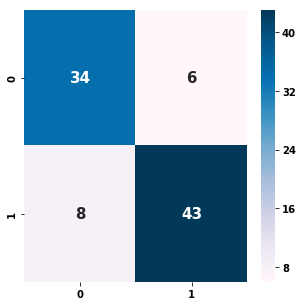

In [785]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_abc)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [786]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.85
Specificity :  0.8431372549019608


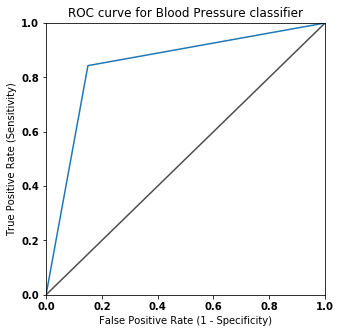

In [787]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_abc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [788]:
accuracy_score(y_test, predict_lr)


0.8021978021978022

In [789]:
accuracy_score(y_test, predict_dt)


0.7032967032967034

In [790]:
accuracy_score(y_test, predict_rf)


0.8351648351648352

In [791]:
accuracy_score(y_test, predict_xg)


0.8241758241758241

In [792]:
accuracy_score(y_test, predict_abc)


0.8461538461538461

In [793]:
accuracy_score(y_test, predict_knn)


0.8351648351648352

In [794]:
accuracy_score(y_test, predict_svm)

0.8461538461538461